# Challenge 3

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [4]:
titanic.select_dtypes(exclude=['category', 'object']).head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [5]:
titanic.select_dtypes(include=['category', 'object']).head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [6]:
plt.style.use('classic')

#### Use the appropriate visulalization to show the distribution of the column `Age`

(array([ 72.,  78., 326., 347., 220., 136.,  75.,  42.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <BarContainer object of 10 artists>)

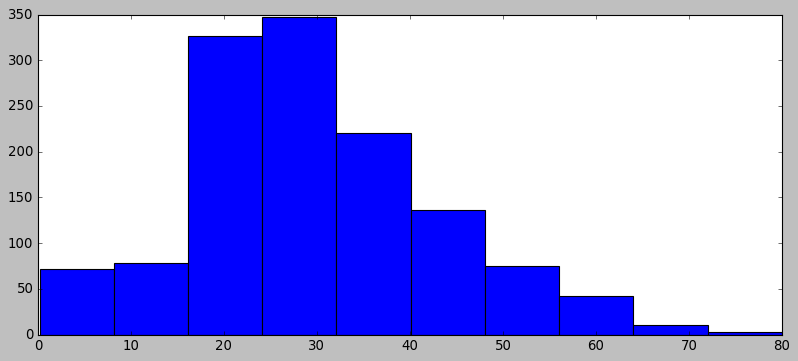

In [7]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot()
plt.hist(titanic['Age'])

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

(array([162., 963.]), array([10, 20, 50]), <BarContainer object of 2 artists>)

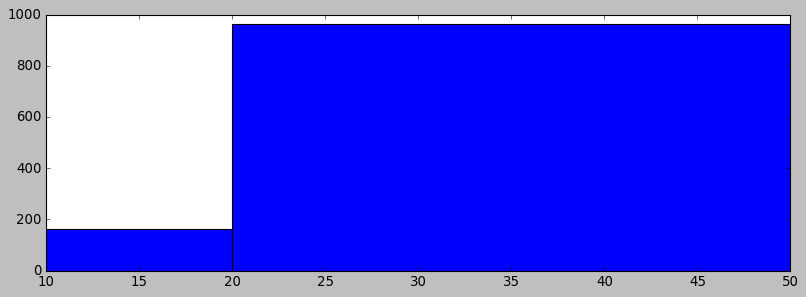

In [8]:
fig = plt.figure(figsize=(12,4))
ax = plt.subplot()
plt.hist(titanic['Age'], bins=[10,20,50])

#### Whether the bin size affects your plot? Why?

#### Use seaborn to show the distribution of the column `Age`

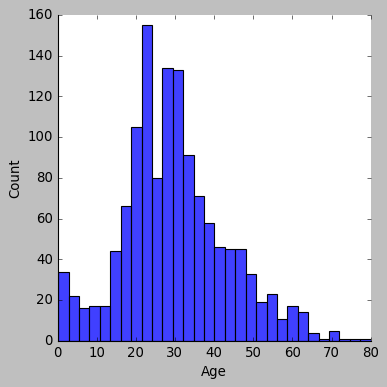

In [9]:
sns.displot(titanic, x='Age')

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

In [10]:
titanic["Gender"].value_counts(), titanic.columns

(male      843
 female    466
 Name: Gender, dtype: int64,
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

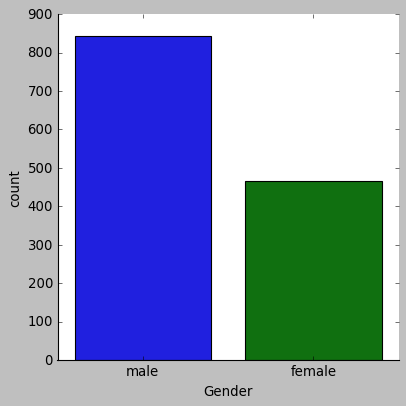

In [29]:
sns.catplot(x='Gender', data=titanic, kind='count')

<AxesSubplot:>

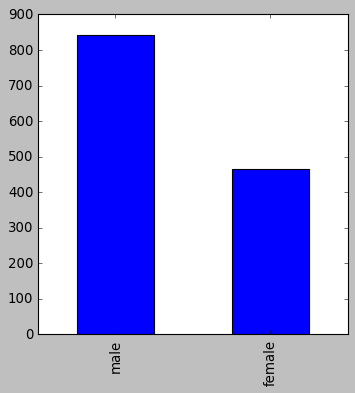

In [12]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()
titanic.Gender.value_counts().plot(kind = 'bar')

#### Use the appropriate plot to visualize the column `Pclass` 


In [13]:
titanic.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

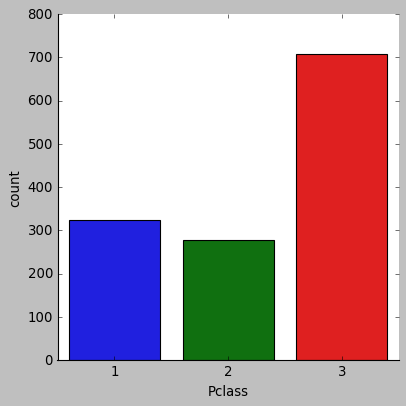

In [14]:
sns.catplot(x='Pclass', data=titanic, kind='count')

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

Text(0.7, 0.4, 'count    1309.000000\nmean       29.879186\nstd        13.448335\nmin         0.170000\n25%        22.000000\n50%        28.500000\n75%        37.000000\nmax        80.000000')

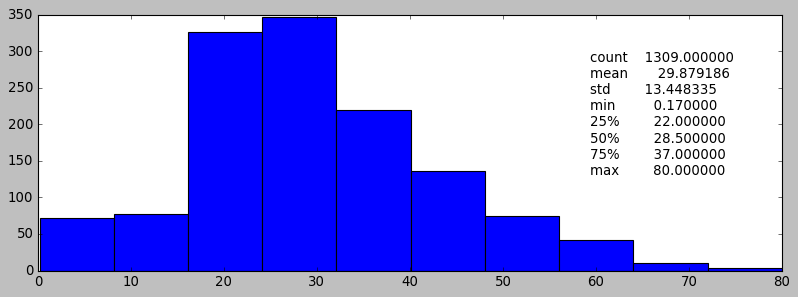

In [15]:
fig, ax = plt.subplots(figsize=(12,4))
ax.hist(titanic['Age'])
plt.figtext(0.7,0.4, titanic.Age.describe().to_string())

#### What does the previous plot tell you about the feature `Age`? Comment.

In [16]:
# Most of the people were between 22 and 37 years old.

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

In [17]:
titanic['Fare'].value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
33.5000     1
7.8000      1
26.3875     1
15.5792     1
7.1417      1
Name: Fare, Length: 281, dtype: int64

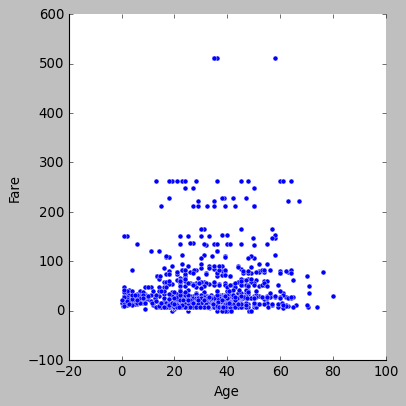

In [20]:
sns.relplot(x='Age', y='Fare', data=titanic)

(0.0, 512.3292)

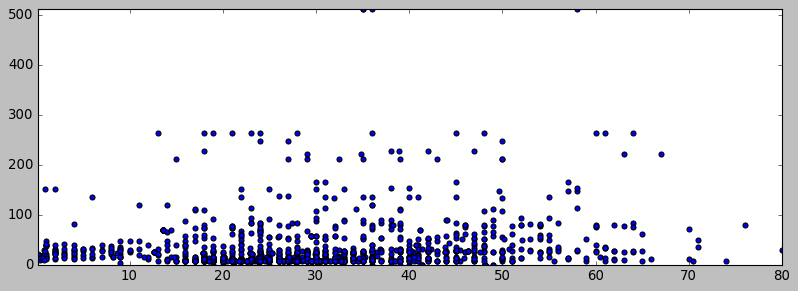

In [22]:
fig, ax = plt.subplots(figsize=(12,4))
ax.scatter(titanic['Age'], titanic['Fare'])
plt.xlim(titanic['Age'].min(), titanic['Age'].max())
plt.ylim(titanic['Fare'].min(), titanic['Fare'].max())

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

<AxesSubplot:>

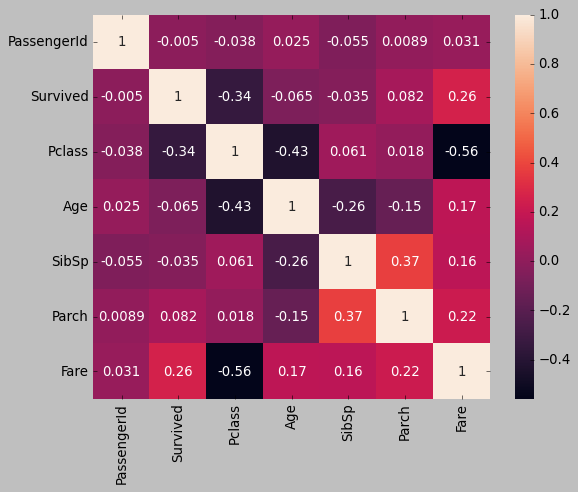

In [23]:
sns.heatmap(titanic.corr(), annot=True, )

#### According to the previous plot, what are the most correlated feature? Comment.

In [24]:
# Plclass/Fare
# Plclass/Age

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

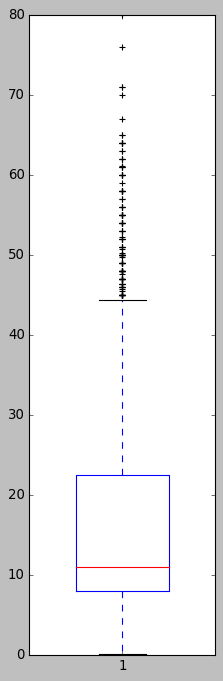

In [25]:
plt.figure(figsize=(3,10))
plt.subplot()
plt.boxplot((titanic.Age / titanic.Pclass), widths=(0.5))
plt.show()

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

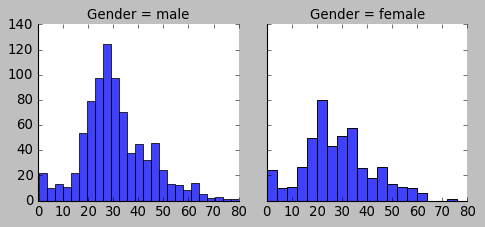

In [34]:
ax = sns.FacetGrid(titanic, col='Gender')
ax.map_dataframe(sns.histplot, x="Age")
